In [1]:
import torch
import numpy as np
from main import *
from torch.utils.data import DataLoader
from models.transformers import TransformerRegressor
from models.deepsets import DeepSetRegression

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = np.load('data/large/scaled/YZ_Cost_Scaled.npz')['data']
data = data[np.random.permutation(data.shape[0]), :]
fold = 5
model = SimpleNN(2048, 1, 8, nn.ReLU)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()
num_epochs = 50
train_losses1, test_losses1 = cross_validate(fold, model, optimizer, criterion, num_epochs, data, 64, device)

0-Fold
Epoch 1 - Train Loss: 0.0655, Test Loss: 0.0198
Epoch 2 - Train Loss: 0.0161, Test Loss: 0.0130
Epoch 3 - Train Loss: 0.0117, Test Loss: 0.0106
Epoch 4 - Train Loss: 0.0105, Test Loss: 0.0096
Epoch 5 - Train Loss: 0.0093, Test Loss: 0.0089
Epoch 6 - Train Loss: 0.0087, Test Loss: 0.0085
Epoch 7 - Train Loss: 0.0083, Test Loss: 0.0082
Epoch 8 - Train Loss: 0.0080, Test Loss: 0.0080
Epoch 9 - Train Loss: 0.0078, Test Loss: 0.0078
Epoch 10 - Train Loss: 0.0076, Test Loss: 0.0076
Epoch 11 - Train Loss: 0.0074, Test Loss: 0.0075
Epoch 12 - Train Loss: 0.0072, Test Loss: 0.0074
Epoch 13 - Train Loss: 0.0071, Test Loss: 0.0073
Epoch 14 - Train Loss: 0.0070, Test Loss: 0.0072
Epoch 15 - Train Loss: 0.0069, Test Loss: 0.0071
Epoch 16 - Train Loss: 0.0068, Test Loss: 0.0070
Epoch 17 - Train Loss: 0.0069, Test Loss: 0.0070
Epoch 18 - Train Loss: 0.0067, Test Loss: 0.0070
Epoch 19 - Train Loss: 0.0065, Test Loss: 0.0068
Epoch 20 - Train Loss: 0.0065, Test Loss: 0.0068
Epoch 21 - Train Loss:

In [10]:
stopped = -1
NN1_Fold_train = []
NN1_Fold_test = []
for i in range(5):
    NN1_Fold_train.append(train_losses1[i][stopped])
    NN1_Fold_test.append(test_losses1[i][stopped])
    print(f"Fold {i + 1}")
    print(f"Training MSE: {train_losses1[i][stopped]}")
    print(f"Testing MSE: {test_losses1[i][stopped]}")
print(f"Mean Training MSE: {np.mean(NN1_Fold_train)}")
print(f"Mean Test MSE: {np.mean(NN1_Fold_test)}")
print()
print(f"Standard Deviation Train MSE: {np.std(NN1_Fold_train)}")
print(f"Standard Deviation Test MSE: {np.std(NN1_Fold_test)}")

Fold 1
Training MSE: 0.005659170530722007
Testing MSE: 0.006044883021490862
Fold 2
Training MSE: 0.005784758680339039
Testing MSE: 0.006433854665284278
Fold 3
Training MSE: 0.005674505932230231
Testing MSE: 0.006575306709538626
Fold 4
Training MSE: 0.005599702913255293
Testing MSE: 0.006199234395919385
Fold 5
Training MSE: 0.005441505238704173
Testing MSE: 0.006240606637406321
Mean Training MSE: 0.005631928659050148
Mean Test MSE: 0.006298777085927895

Standard Deviation Train MSE: 0.00011243801570562758
Standard Deviation Test MSE: 0.00018572524295354164


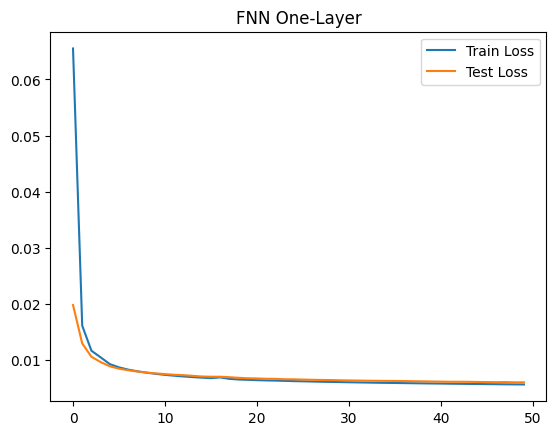

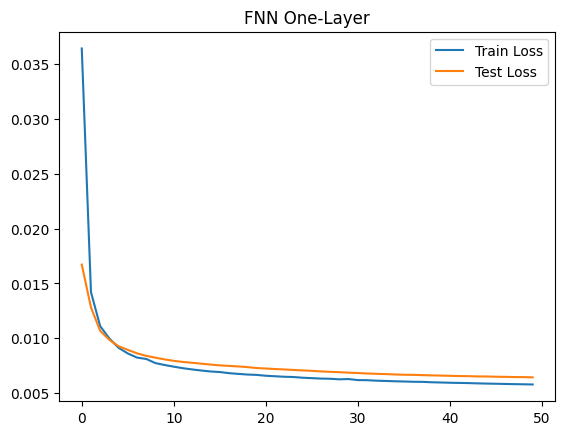

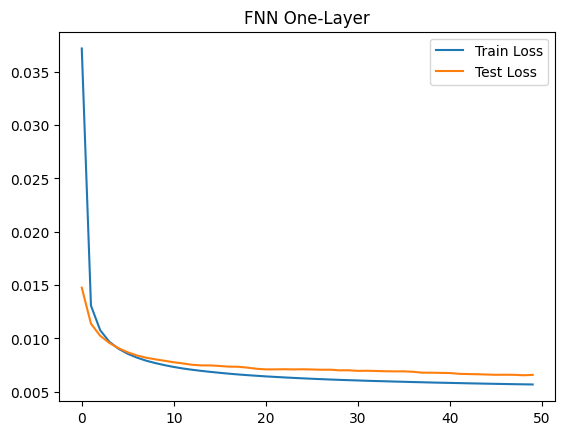

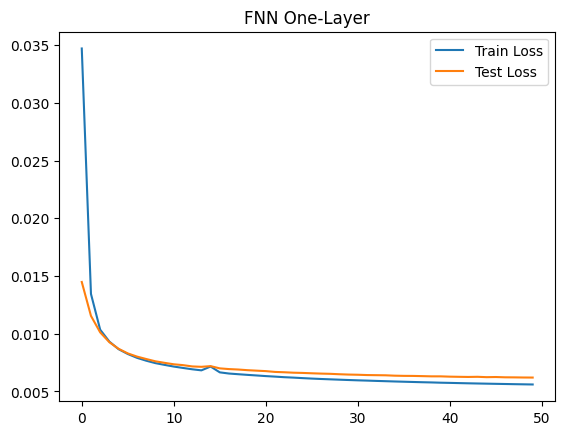

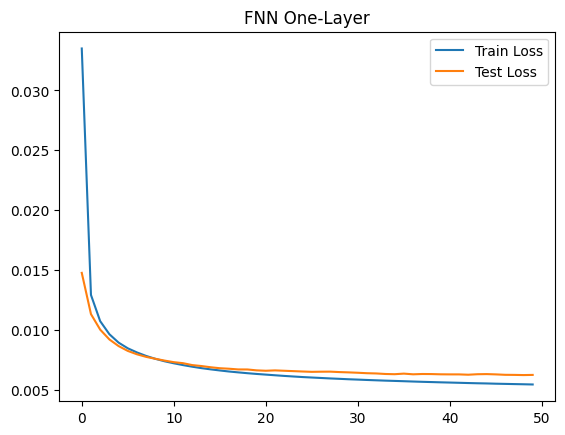

In [12]:
for i in range(fold):
    plt.title('FNN One-Layer')
    plt.plot(train_losses1[i], label = 'Train Loss')
    plt.plot(test_losses1[i], label = 'Test Loss')
    plt.legend()
    plt.show()

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = np.load('data/large/scaled/YZ_Cost_Scaled.npz')['data']
data = data[np.random.permutation(data.shape[0]), :]
fold = 5
model = NN2(2048, 1, 8, 8, nn.ReLU)
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()
num_epochs = 50
train_losses2, test_losses2 = cross_validate(fold, model, optimizer, criterion, num_epochs, data, 64, device)

0-Fold
Epoch 1 - Train Loss: 0.4103, Test Loss: 0.3591
Epoch 2 - Train Loss: 0.3088, Test Loss: 0.2864
Epoch 3 - Train Loss: 0.2459, Test Loss: 0.2294
Epoch 4 - Train Loss: 0.1951, Test Loss: 0.1813
Epoch 5 - Train Loss: 0.1528, Test Loss: 0.1423
Epoch 6 - Train Loss: 0.1192, Test Loss: 0.1114
Epoch 7 - Train Loss: 0.0667, Test Loss: 0.0164
Epoch 8 - Train Loss: 0.0125, Test Loss: 0.0111
Epoch 9 - Train Loss: 0.0100, Test Loss: 0.0097
Epoch 10 - Train Loss: 0.0091, Test Loss: 0.0090
Epoch 11 - Train Loss: 0.0084, Test Loss: 0.0085
Epoch 12 - Train Loss: 0.0081, Test Loss: 0.0081
Epoch 13 - Train Loss: 0.0077, Test Loss: 0.0078
Epoch 14 - Train Loss: 0.0075, Test Loss: 0.0076
Epoch 15 - Train Loss: 0.0072, Test Loss: 0.0074
Epoch 16 - Train Loss: 0.0071, Test Loss: 0.0072
Epoch 17 - Train Loss: 0.0069, Test Loss: 0.0071
Epoch 18 - Train Loss: 0.0067, Test Loss: 0.0070
Epoch 19 - Train Loss: 0.0067, Test Loss: 0.0069
Epoch 20 - Train Loss: 0.0066, Test Loss: 0.0068
Epoch 21 - Train Loss:

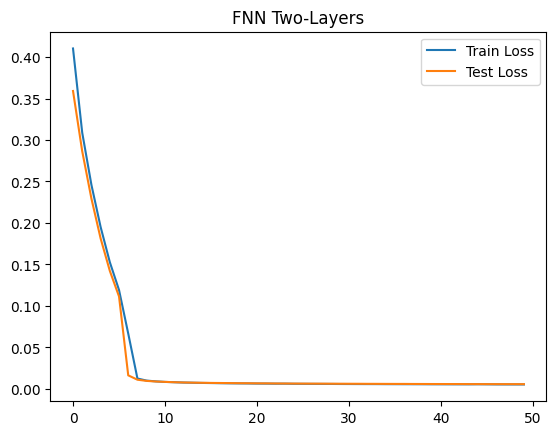

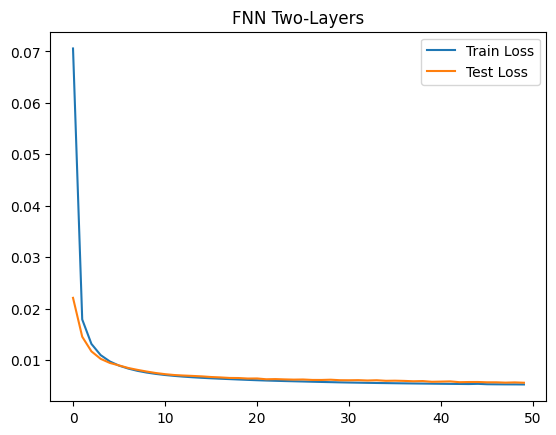

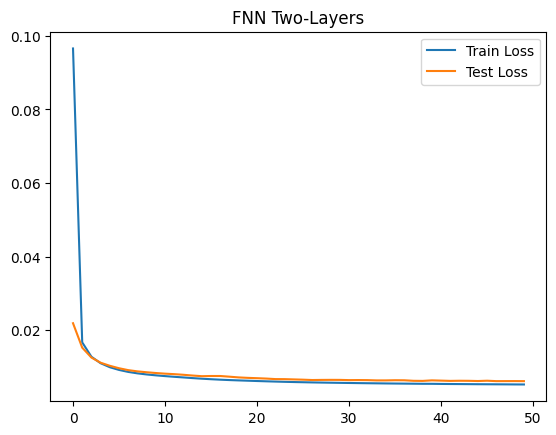

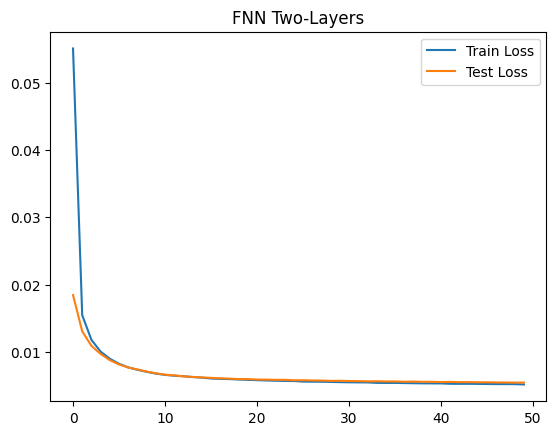

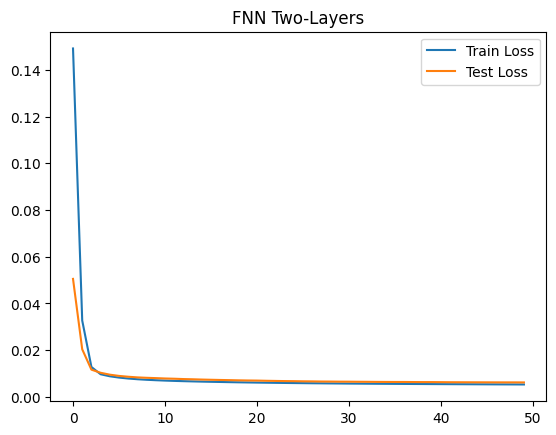

In [13]:
for i in range(fold):
    plt.title('FNN Two-Layers')
    plt.plot(train_losses2[i], label = 'Train Loss')
    plt.plot(test_losses2[i], label = 'Test Loss')
    plt.legend()
    plt.show()

In [11]:
stopped = -1
NN2_Fold_train = []
NN2_Fold_test = []
for i in range(5):
    NN2_Fold_train.append(train_losses2[i][stopped])
    NN2_Fold_test.append(test_losses2[i][stopped])
    print(f"Fold {i + 1}")
    print(f"Training MSE: {train_losses2[i][stopped]}")
    print(f"Testing MSE: {test_losses2[i][stopped]}")
print(f"Mean Training MSE: {np.mean(NN2_Fold_train)}")
print(f"Mean Test MSE: {np.mean(NN2_Fold_test)}")
print()
print(f"Standard Deviation Train MSE: {np.std(NN2_Fold_train)}")
print(f"Standard Deviation Test MSE: {np.std(NN2_Fold_test)}")

Fold 1
Training MSE: 0.00535672704035835
Testing MSE: 0.005729379913778312
Fold 2
Training MSE: 0.005252290965020358
Testing MSE: 0.005590222624560166
Fold 3
Training MSE: 0.0052719017783349675
Testing MSE: 0.006179381120119579
Fold 4
Training MSE: 0.005131186437425164
Testing MSE: 0.0054123215254788335
Fold 5
Training MSE: 0.0052468193053120645
Testing MSE: 0.006123801620515646
Mean Training MSE: 0.00525178510529018
Mean Test MSE: 0.0058070213608905075

Standard Deviation Train MSE: 7.209222430269239e-05
Standard Deviation Test MSE: 0.00029927224048996356


In [2]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_testing.npz'), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_training.npz'), batch_size= 64, shuffle=True)
model = DeepSetRegression(2, 1, 1, pooling='robust_mean', dim_hidden= 64).to(device)

learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.1382, Test Loss: 0.0728
Epoch 2 - Train Loss: 0.0729, Test Loss: 0.0798
Epoch 3 - Train Loss: 0.0674, Test Loss: 0.0644
Epoch 4 - Train Loss: 0.0625, Test Loss: 0.0637
Epoch 5 - Train Loss: 0.0585, Test Loss: 0.0548
Epoch 6 - Train Loss: 0.0556, Test Loss: 0.0499
Epoch 7 - Train Loss: 0.0515, Test Loss: 0.0439
Epoch 8 - Train Loss: 0.0463, Test Loss: 0.0541
Epoch 9 - Train Loss: 0.0429, Test Loss: 0.0352
Epoch 10 - Train Loss: 0.0386, Test Loss: 0.0408
Epoch 11 - Train Loss: 0.0354, Test Loss: 0.0305
Epoch 12 - Train Loss: 0.0311, Test Loss: 0.0324
Epoch 13 - Train Loss: 0.0301, Test Loss: 0.0349
Epoch 14 - Train Loss: 0.0292, Test Loss: 0.0255
Epoch 15 - Train Loss: 0.0272, Test Loss: 0.0270
Epoch 16 - Train Loss: 0.0274, Test Loss: 0.0314
Epoch 17 - Train Loss: 0.0254, Test Loss: 0.0222
Epoch 18 - Train Loss: 0.0250, Test Loss: 0.0307
Epoch 19 - Train Loss: 0.0245, Test Loss: 0.0225
Epoch 20 - Train Loss: 0.0242, Test Loss: 0.0369
Epoch 21 - Train Loss: 0.0242

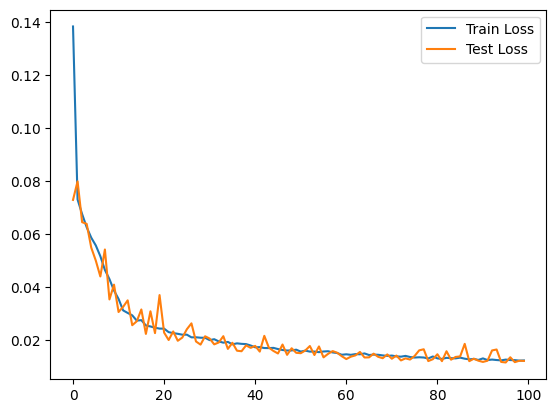

In [3]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [4]:
torch.save(model.state_dict(), 'DeepSet_Weight.pt')

In [2]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset('data/large/scaled/YZ_Large_testing.npz'), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset('data/large/scaled/YZ_Large_training.npz'), batch_size= 64, shuffle=True)
model = SimpleNN(2048, 1, 8, nn.ReLU).to(device)

learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.0330, Test Loss: 0.0174
Epoch 2 - Train Loss: 0.0139, Test Loss: 0.0115
Epoch 3 - Train Loss: 0.0121, Test Loss: 0.0103
Epoch 4 - Train Loss: 0.0110, Test Loss: 0.0114
Epoch 5 - Train Loss: 0.0101, Test Loss: 0.0102
Epoch 6 - Train Loss: 0.0097, Test Loss: 0.0120
Epoch 7 - Train Loss: 0.0094, Test Loss: 0.0104
Epoch 8 - Train Loss: 0.0091, Test Loss: 0.0091
Epoch 9 - Train Loss: 0.0087, Test Loss: 0.0090
Epoch 10 - Train Loss: 0.0084, Test Loss: 0.0086
Epoch 11 - Train Loss: 0.0082, Test Loss: 0.0090
Epoch 12 - Train Loss: 0.0079, Test Loss: 0.0074
Epoch 13 - Train Loss: 0.0078, Test Loss: 0.0079
Epoch 14 - Train Loss: 0.0077, Test Loss: 0.0073
Epoch 15 - Train Loss: 0.0076, Test Loss: 0.0082
Epoch 16 - Train Loss: 0.0074, Test Loss: 0.0079
Epoch 17 - Train Loss: 0.0074, Test Loss: 0.0090
Epoch 18 - Train Loss: 0.0074, Test Loss: 0.0081
Epoch 19 - Train Loss: 0.0078, Test Loss: 0.0076
Epoch 20 - Train Loss: 0.0071, Test Loss: 0.0071
Epoch 21 - Train Loss: 0.0070

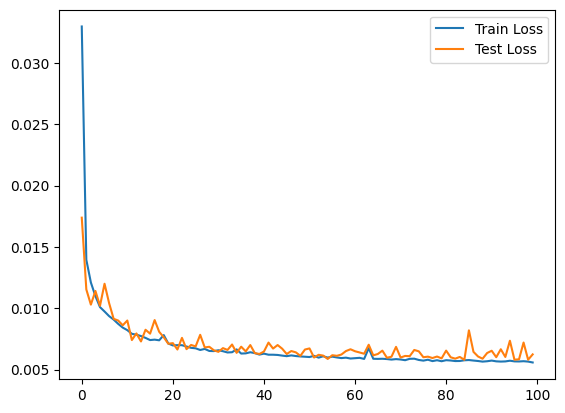

In [3]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [4]:
torch.save(model.state_dict(), '1NN_Weight.pt')

In [2]:
# np.random.seed(100)
# torch.manual_seed(100)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader = DataLoader(AntDataset('data/large/scaled/YZ_Large_testing.npz', shuffle=True), batch_size= 64, shuffle=True)
test_loader = DataLoader(AntDataset('data/large/scaled/YZ_Large_training.npz', shuffle = True), batch_size= 64, shuffle=True)
model = NN2(2048, 1, 8, 8, nn.ReLU).to(device)

learning_rate = 1e-3
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Epoch 1 - Train Loss: 0.0283, Test Loss: 0.0107
Epoch 2 - Train Loss: 0.0107, Test Loss: 0.0092
Epoch 3 - Train Loss: 0.0096, Test Loss: 0.0088
Epoch 4 - Train Loss: 0.0088, Test Loss: 0.0081
Epoch 5 - Train Loss: 0.0081, Test Loss: 0.0077
Epoch 6 - Train Loss: 0.0080, Test Loss: 0.0074
Epoch 7 - Train Loss: 0.0076, Test Loss: 0.0079
Epoch 8 - Train Loss: 0.0074, Test Loss: 0.0102
Epoch 9 - Train Loss: 0.0072, Test Loss: 0.0075
Epoch 10 - Train Loss: 0.0072, Test Loss: 0.0071
Epoch 11 - Train Loss: 0.0069, Test Loss: 0.0067
Epoch 12 - Train Loss: 0.0081, Test Loss: 0.0067
Epoch 13 - Train Loss: 0.0068, Test Loss: 0.0066
Epoch 14 - Train Loss: 0.0066, Test Loss: 0.0070
Epoch 15 - Train Loss: 0.0065, Test Loss: 0.0067
Epoch 16 - Train Loss: 0.0065, Test Loss: 0.0081
Epoch 17 - Train Loss: 0.0064, Test Loss: 0.0069
Epoch 18 - Train Loss: 0.0063, Test Loss: 0.0061
Epoch 19 - Train Loss: 0.0063, Test Loss: 0.0061
Epoch 20 - Train Loss: 0.0062, Test Loss: 0.0062
Epoch 21 - Train Loss: 0.0062

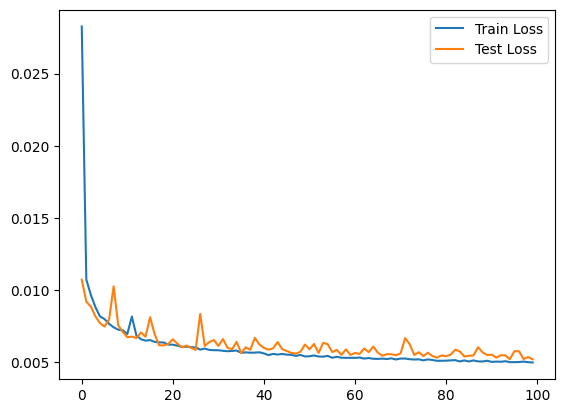

In [4]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [7]:
torch.save(model.state_dict(), '2NN_Weight.pt')

## Shuffle Antenna Test
We will shuffle the antennas within a pattern. In a sense, this shouldn't affect the cost, but this test will show whether a model is permutation invariant or not

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_loader_1D = DataLoader(AntDataset('data/large/scaled/YZ_Large_training.npz', shuffle = True), batch_size = 64, shuffle = True)
test_loader_2D = DataLoader(AntDataset2D('data/large/scaled/YZ_Large_training.npz', shuffle = True), batch_size = 64, shuffle = True)
criterion = nn.MSELoss()

NN1 = SimpleNN(2048, 1, 8, nn.ReLU)
NN1.load_state_dict(torch.load('weights/FFNN/1NN_Weight.pt'))
NN1.to(device)
test_loss_NN1 = evaluate(NN1, criterion, test_loader_1D, device)

NN2 = NN2(2048, 1, 8, 8, nn.ReLU)
NN2.load_state_dict(torch.load('weights/FFNN/2NN_Weight.pt'))
NN2.to(device)
test_loss_NN2 = evaluate(NN2, criterion, test_loader_1D, device)

DeepSet = DeepSetRegression(2, 1, 1, pooling='robust_mean', dim_hidden= 64)
DeepSet.load_state_dict(torch.load('weights/DeepSet/DeepSet_Weight.pt'))
DeepSet.to(device)
test_loss_Deep = evaluate(DeepSet, criterion, test_loader_2D, device)

In [9]:
test_loss_NN1

2.631243312161816

In [10]:
test_loss_NN2

2.062378380909439

In [11]:
test_loss_Deep

0.012002272295673216

## Transformer Base Test

In [3]:
train_data_path = 'data/large/YZ_Large_testing.npz'
test_data_path = 'data/large/YZ_Large_training.npz'

torch.manual_seed(0)
train_loader = DataLoader(AntDataset2D(train_data_path), batch_size = 64, shuffle= True)
test_loader = DataLoader(AntDataset2D(test_data_path), batch_size = 64, shuffle = True)

print('Finish DataLoaders')

# Hyperparameters
d_model = 1024
nhead = 2
num_encoder_layers = 6
num_decoder_layers = 6
dim_feedforward = 1024
dropout = 0.1
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TransformerRegressor(d_model, nhead,
                             num_encoder_layers,
                             num_decoder_layers,
                             dim_feedforward,
                             dropout).to(device)
print('Loaded Model')
learning_rate = 1e-3
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs, device)

Finish DataLoaders
Loaded Model


/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/nn/modules/transformer.py:287: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Epoch 1 - Train Loss: 1.0906, Test Loss: 0.8875
Epoch 2 - Train Loss: 0.8954, Test Loss: 0.8836
Epoch 3 - Train Loss: 0.8903, Test Loss: 0.8839
Epoch 4 - Train Loss: 0.8881, Test Loss: 0.8795
Epoch 5 - Train Loss: 0.8862, Test Loss: 0.8795
Epoch 6 - Train Loss: 0.8858, Test Loss: 0.8795
Epoch 7 - Train Loss: 0.8856, Test Loss: 0.8795
Epoch 8 - Train Loss: 0.8860, Test Loss: 0.8802
Epoch 9 - Train Loss: 0.8855, Test Loss: 0.8794
Epoch 10 - Train Loss: 0.8861, Test Loss: 0.8799


KeyboardInterrupt: 

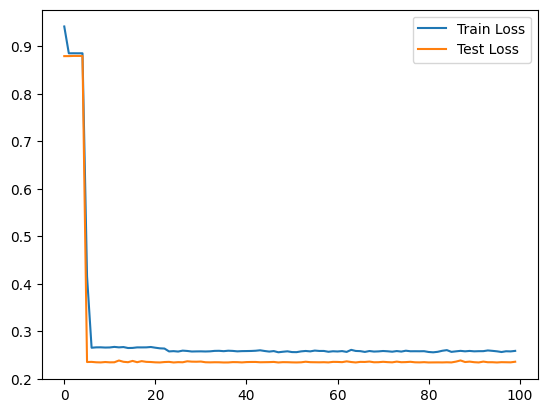

In [4]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

## 1-layer NN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_data_path = 'YZ_Large_training.npz'
test_data_path = 'YZ_Large_testing.npz'
train_loader = DataLoader(AntDataset(train_data_path), batch_size=32, shuffle=True)
test_loader = DataLoader(AntDataset(test_data_path), batch_size=32, shuffle=True)

print('Loaded Data')

# Hyperparameters
model = SimpleNN(2048, 1, 8, nn.ReLU)
model.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, num_epochs, device)

/home/david/anaconda3/envs/torch/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Loaded Data
Average Cost: 0.029260745272040367
Random Guess: 0.0003676150380014723
Epoch 1 - Train Loss: 0.0381, Test Loss: 0.0189
Average Cost: 0.02934732846915722
Random Guess: 0.0004268583046222516
Epoch 2 - Train Loss: 0.0145, Test Loss: 0.0138
Average Cost: 0.029246384277939796
Random Guess: 0.00044581261207937456
Epoch 3 - Train Loss: 0.0126, Test Loss: 0.0130
Average Cost: 0.029361430555582047
Random Guess: 0.0004775790203424595
Epoch 4 - Train Loss: 0.0114, Test Loss: 0.0119
Average Cost: 0.029377372935414314
Random Guess: 0.0004186142739180296
Epoch 5 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029280079528689384
Random Guess: 0.0004268459763682636
Epoch 6 - Train Loss: 0.0103, Test Loss: 0.0111
Average Cost: 0.029285846278071404
Random Guess: 0.0004787548158552593
Epoch 7 - Train Loss: 0.0098, Test Loss: 0.0104
Average Cost: 0.02927250601351261
Random Guess: 0.00041671495926212513
Epoch 8 - Train Loss: 0.0095, Test Loss: 0.0110
Average Cost: 0.02937469631433487
Ra

In [3]:
two_layer = NN2(2048, 1, 8, 8, nn.ReLU)
two_layer.to(device)

learning_rate = 0.001
num_epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(two_layer.parameters(), lr = learning_rate)

train_loss2, test_loss2 = train_and_evaluate(two_layer, optimizer, criterion, train_loader, test_loader, num_epochs, device)

Average Cost: 0.029378963634371758
Random Guess: 0.0003208396791369874
Epoch 1 - Train Loss: 0.0609, Test Loss: 0.0161
Average Cost: 0.029388563707470894
Random Guess: 0.00022894685933370017
Epoch 2 - Train Loss: 0.0136, Test Loss: 0.0122
Average Cost: 0.029249003157019615
Random Guess: 0.00016045296704176324
Epoch 3 - Train Loss: 0.0109, Test Loss: 0.0111
Average Cost: 0.029342170804739
Random Guess: 0.0001386364516800641
Epoch 4 - Train Loss: 0.0104, Test Loss: 0.0095
Average Cost: 0.029341181740164757
Random Guess: 0.0001323832413583928
Epoch 5 - Train Loss: 0.0092, Test Loss: 0.0093
Average Cost: 0.029348960146307945
Random Guess: 0.00010970961095871431
Epoch 6 - Train Loss: 0.0088, Test Loss: 0.0092
Average Cost: 0.029401449486613274
Random Guess: 0.000103396453865566
Epoch 7 - Train Loss: 0.0088, Test Loss: 0.0090
Average Cost: 0.029271433129906654
Random Guess: 8.443119472888505e-05
Epoch 8 - Train Loss: 0.0086, Test Loss: 0.0085
Average Cost: 0.02930477447807789
Random Guess: 0

In [4]:
torch.save(model.state_dict(), 'NN1.pth')
torch.save(two_layer.state_dict(), 'NN2.pth')

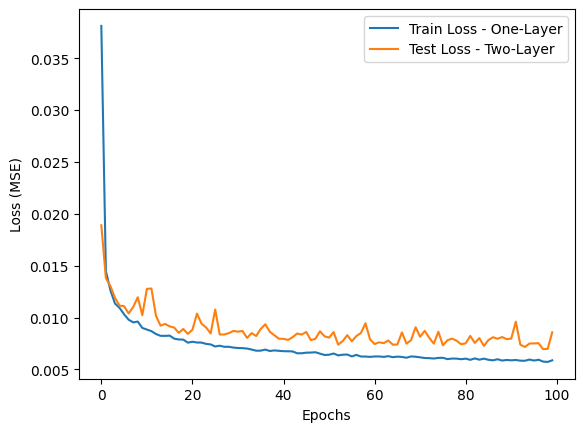

In [5]:
# Plot A and B on the same figure
plt.plot(train_loss, label = 'Train Loss - One-Layer')
plt.plot(test_loss, label='Test Loss - Two-Layer')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


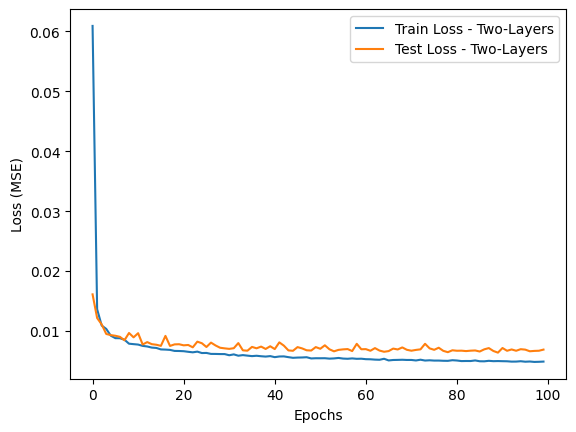

In [6]:
# Plot A and B on the same figure
plt.plot(train_loss2, label = 'Train Loss - Two-Layers')
plt.plot(test_loss2, label='Test Loss - Two-Layers')

# Add axis labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Show the plot
plt.show()


In [5]:
for (inp, out) in train_loader:
    src_mask = torch.any(inp != torch.tensor([0, 0], dtype=inp.dtype, device=inp.device), dim=-1)
    print(src_mask)
    print(src_mask.shape)
    break

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False]])
torch.Size([32, 1024])
